The purpose to the project is to use implement machine learning algorithms for predicting fraud detection
The dataset was obtained from Kaggle (https://www.kaggle.com/mlg-ulb/creditcardfraud) and contains information on the features (28 features selected from PCA and deidentified) which will be used for predicting the fraud detection

In [3]:
#import packages 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn


<function posix.getcwd()>

In [2]:
##read in the dataset
data=pd.read_csv("/Users/shrutiparulekar/Desktop/data science/kaggle/credit_card_fraud_detection/creditcard.csv")
data.head()
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
#split the dataset into test and train data
#create labels series
from sklearn.model_selection import train_test_split
y=data['Class']
X=data.drop(['Class'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [4]:
##perform exploratory data analysis 

In [5]:
#generate a scatter plot to check the features related to outcome
print(X_train.describe())
#the features V1-V28 seem to have a similar range of values

                Time             V1             V2             V3  \
count  190820.000000  190820.000000  190820.000000  190820.000000   
mean    94813.975275       0.000250      -0.003040      -0.001557   
std     47514.214448       1.965457       1.658139       1.516553   
min         0.000000     -46.855047     -63.344698     -33.680984   
25%     54132.750000      -0.921287      -0.601963      -0.893090   
50%     84637.500000       0.020151       0.063791       0.177196   
75%    139379.500000       1.316737       0.802789       1.025456   
max    172792.000000       2.451888      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  190820.000000  190820.000000  190820.000000  190820.000000   
mean        0.001140      -0.001209       0.000036      -0.001151   
std         1.417932       1.372321       1.329107       1.228864   
min        -5.560118     -42.147898     -23.496714     -43.557242   
25%        -0.848352      -0.6919

0.00811963026353515

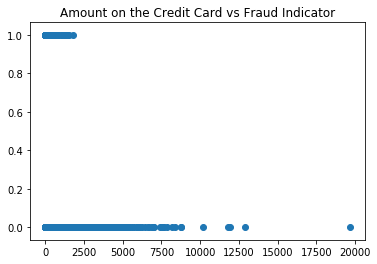

In [6]:
##check the relationship between amount and the credit card fraud value
#import seaborn as sns
plt.scatter(X_train['Amount'],y_train)
plt.title('Amount on the Credit Card vs Fraud Indicator')

X_train['Amount'].corr(y_train, method='pearson', min_periods=1) 

#the plot shows that the amount variable has outliers 
##this variable doesn't seem to be highly correlated with the outcome(fraud transactions) we are predicting

In [36]:
##using a naives bayes clssifier for prediction (to get the auc using a simpler clssification algorithm for reference)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
clf = GaussianNB()
clf.fit(X_train, y_train)

nb_pr_auc=cross_val_score(clf, X_train, y_train, cv=5, scoring = 'average_precision')
avg_nb_pr_auc=nb_pr_auc.mean()
print("Precision Recall AUC for Naive Bayes Classifier is" , avg_nb_pr_auc)

##the precision recall AUC is very low using the Naive Bayes approach

Precision Recall AUC for Naive Bayes Classifier is 0.1682868221914222


array([0.15487963, 0.20138021, 0.1778117 , 0.1616241 , 0.14573847])

In [37]:
##using boosting methods to fit a model to classify fraud and not fraud transactions
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

#fit model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# using k fold cross validation to get the precision recall auc
xgb_pr_auc=cross_val_score(model, X_train, y_train, cv=5, scoring = 'average_precision')
avg_xgb_pr_auc=xgb_pr_auc.mean()
print("Precision Recall AUC using XGBoost Classifier is" , avg_xgb_pr_auc)

Precision Recall AUC using XGBoost Classifier is 0.8527556704301429


In [40]:
##check if the auc changes by changing parameters
##looping through n_estimators

n_estimators_list=[10,100,300]
for n in n_estimators_list:
    model = XGBClassifier(learning_rate = 0.05, n_estimators=n, max_depth=5)
    model.fit(X_train, y_train)

    # using k fold cross validation to get the precision recall auc
    xgb_pr_auc=cross_val_score(model, X_train, y_train, cv=5, scoring = 'average_precision')
    avg_xgb_pr_auc=xgb_pr_auc.mean()
    print("Precision Recall AUC using XGBoost Classifier for n_estimators=",n, "is" , avg_xgb_pr_auc)

##note there is not substantial gain in the AUC after increasing the n_estimators to 300 compared to 100
##given the increased computing time needed to run the model with 300 estimators 
##using 100 estimators might be reasonable

Precision Recall AUC using XGBoost Classifier for n_estimators= 10 is 0.789647950294667
Precision Recall AUC using XGBoost Classifier for n_estimators= 100 is 0.8527556704301429
Precision Recall AUC using XGBoost Classifier for n_estimators= 300 is 0.8623252982671534


In [44]:
##fit the test set data to get predictions
model = XGBClassifier(learning_rate = 0.05, n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

#get predictions for the test data
y_test_probs=model.predict(X_test)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)
avg_xgb_pr_auc_test=auc(recall, precision)
print("Precision Recall AUC using XGBoost Classifier for the test data is" , avg_xgb_pr_auc_test)


Precision Recall AUC using XGBoost Classifier for the test data is 0.8625318749756171


Text(0, 0.5, 'Features')

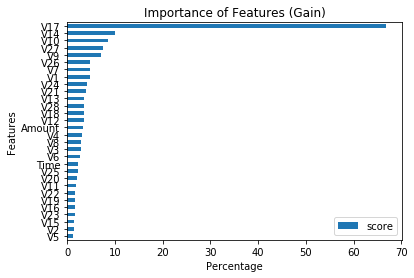

In [50]:
##summarize/plot the important features 
feature_important = model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh')
plt.title("Importance of Features (Gain)")
plt.xlabel("Percentage")
plt.ylabel("Features")